In [ ]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv("stock_details_5_years.csv")

In [ ]:
print("Dataset INFO:")
print(df.info())

Dataset INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB
None


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())
df['Date'] = pd.to_datetime(df['Date'])


Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Open           High            Low          Close  \
count  602962.000000  602962.000000  602962.000000  602962.000000   
mean      140.074711     141.853492     138.276316     140.095204   
std       275.401725     279.003191     271.895276     275.477969   
min         1.052425       1.061195       1.026114       1.034884   
25%        39.566159      40.056222      39.058151      39.563746   
50%        79.177964      80.125563      78.193820      79.177906   
75%       157.837190     159.746317     155.841609     157.847153   
max      6490.259766    6525.000000    6405.000000    6509.350098   

             Volume     Dividends   Stock Splits  
count  6.029620e+05  602962.00000  602962.000000  
mean   5.895601e+06       0.00731       0.000344  
std    1.381596e+07       0.12057       0.050607  
min    0.000000e+00       0.00000       0.000000  
25%    1.031500e+06       0.00000       0.000000  
50%    2.228700e+06       0.00000       0.000000  


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.0,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.0,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.0,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.0,0.0,CCJ
602961,2023-11-29 00:00:00-05:00,84.629997,84.995003,83.529999,83.889999,830092,0.0,0.0,LYV


In [ ]:
def analyze_company(company_name):
    df = pd.read_csv("stock_details_5_years.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')

    # Filter data for the specified company
    company_df = df[df['Company'] == company_name]

    if company_df.empty:
        print(f"No data available for company: {company_name}")
        return

    # Select the features and target
    features = ['Open', 'High', 'Low', 'Volume']
    target = 'Close'

    # Split the data into features and target
    X = company_df[features].values
    y = company_df[target].values

    # Normalize the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Reshape the data for LSTM input
    X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_scaled.shape[1])))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"MSE for {company_name}: {mse}")
    print(f"MAE for {company_name}: {mae}")
    print(f"R-squared for {company_name}: {r2}")

    # Plot actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.title(f'Actual vs. Predicted Closing Prices for {company_name}')
    plt.xlabel('Test Samples')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()


Enter the company name (e.g., AAPL for Apple Inc.): MSFT
Epoch 1/50


C:\Users\bhaga\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - loss: 56638.0078
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 57366.6914
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 56407.2031
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 56679.3047
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 57640.2812
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 55173.4961
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 55891.2070
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 55794.9297
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 54257.4297
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53147.6602 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 52614.8125
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49554.5664 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49508.5703 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46887.8203 
Epoch 15/50
32/3

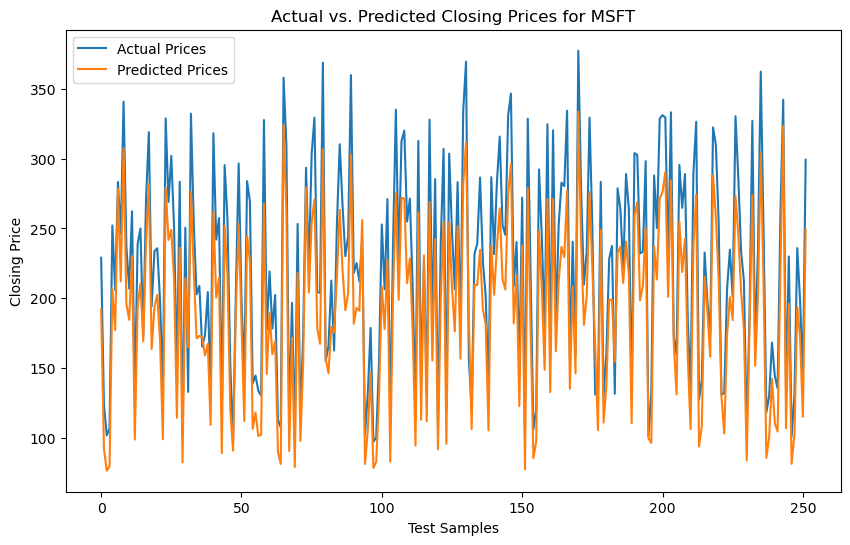

In [ ]:

# Ask the user for the company name
company_name = input("Enter the company name (e.g., AAPL for Apple Inc.): ")
analyze_company(company_name)

Enter the company name (e.g., AAPL for Apple Inc.): GOOGL
Epoch 1/50


C:\Users\bhaga\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 10345.0908
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 10423.0654
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 10126.8057
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 10435.1221
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 9949.5469
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 9921.6328
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 9786.7812
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 9200.8096
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 9065.1689
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 8488.2275
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7882.5703 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 7191.8755
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 6696.5732
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6259.7515 
Epoch 15/50
32/32 ━━━━━━

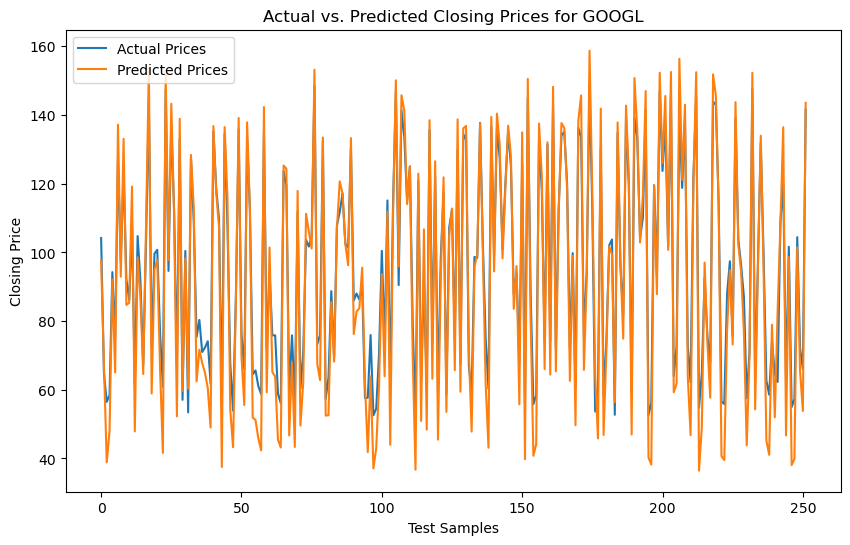

In [ ]:
company_name = input("Enter the company name (e.g., AAPL for Apple Inc.): ")
analyze_company(company_name)